The two heaps pattern is a versatile and efficient approach used to solve problems involving dynamic data processing, optimization, and real-time analysis. As the name suggests, this pattern maintains two heaps, which could be either two min heaps, two max heaps, or a min heap and a max heap. Exploiting the heap property, the two heaps pattern is a preferred technique for various problems to implement computationally efficient solutions. For a heap containing 
n
 elements, inserting or removing an element takes 
O(logn)
 time, while accessing the element at the root is done in 
O(1)
 time. The root stores the smallest element in the case of a min heap and the largest element in the case of a max heap.

 Let’s explore a few example scenarios to gain a better understanding. In some problems, we’re given a dataset and tasked to divide it into two parts to find the smallest value from one part and the largest value from the other part. To achieve this, we can build two heaps: one min heap and one max heap, from these two subsets of data. The root of the min heap will give us the smallest value from its corresponding dataset, while the root of the max heap will provide the largest value from its dataset. In cases where we need to find the two largest numbers from two different datasets, we’ll use two max heaps to store and manage these datasets. Similarly, to find the two smallest numbers from two different datasets, we would use two min heaps. These examples illustrate the versatility of using min heaps and max heaps to efficiently solve different types of problems by facilitating quick access to the smallest or largest values as required.

The following illustration demonstrates how we can build a min heap or a max heap, and how they can be used to solve several tasks, e.g., finding the smallest or largest element from some data:

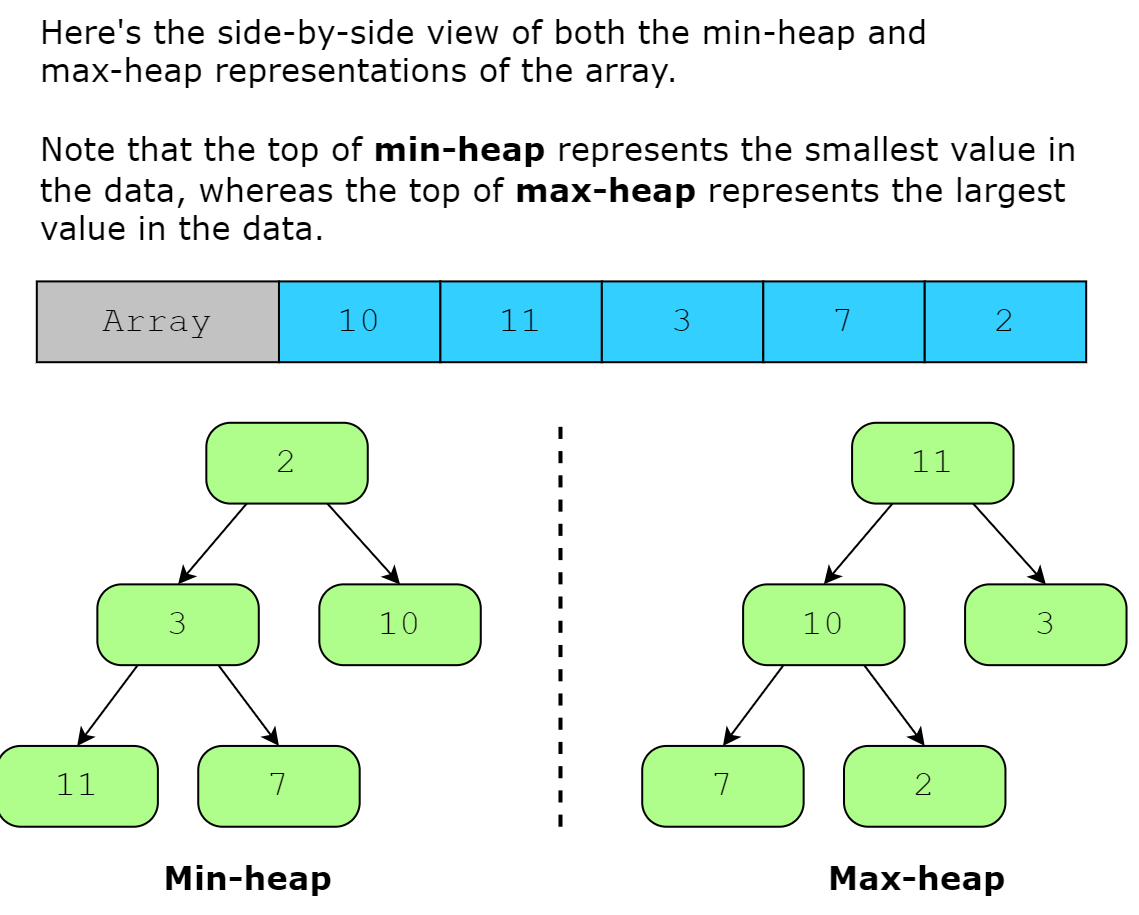

#### Q1. 

Create a data structure that can store a list of integers that can change in size over time and find the median from this dynamically growing list in constant time


solution:

We’ll assume that x is the median of the integers in a list. Half of the numbers in the list will be smaller than (or equal to) x, and the other half will be greater than (or equal to) x. We can divide the list into two halves. One half stores the smaller numbers, and the other half stores the larger numbers.

The median of all numbers will either be the largest number in the small list or the smallest number in the large list. If the total number of elements is even, we know that the median will be the average of these two numbers.

The most efficient data structure for repeatedly finding the smallest or largest number in a changing list is a heap. We can store the first half of the numbers in a max-heap and the second half in a min-heap. That’s why the two heaps pattern is a perfect fit.

Here’s how we’ll implement this algorithm:

1. First, we’ll store the first half of the numbers (smaller than x) in a max-heap. We use a max-heap because we want to know the largest number in the first half of the list.

2. Then, we’ll store the second half of the numbers (larger than x) in a min-heap because we want to know the smallest number in the second half of the list.

3. We can calculate the median of the current list of numbers using the top element of the two heaps.


max_heap to store smaller values. min_heap to store large values

In [1]:
from heapq import *
class max_heap:
    def __init__(self):
        self.max_heap_list = []

    def insert(self, x):
        heappush(self.max_heap_list, -x)

    def get_max(self):
        return -self.max_heap_list[0]

    def __str__(self):
        out = "["
        for i in self.max_heap_list:
            out+=str(i) + ", "
        out = out[:-2] + "]"
        return out


class min_heap:
    def __init__(self):
        self.min_heap_list = []
        
    def insert(self, x):
        heappush(self.min_heap_list, x)

    def get_min(self):
        return self.min_heap_list[0]

    def __str__(self):
        out = "["
        for i in self.min_heap_list:
            out+=str(i) + ", "
        out = out[:-2] + "]"
        return out

In [8]:


# Tip: You may use some of the code templates provided
# in the support files

class MedianOfStream:
  def __init__(self):
    # Write your code here
    self.min_heap = min_heap()
    self.max_heap = max_heap()

  # This function should take a number and store it
  def insert_num(self, num):
    # fill number in max heap first
    # if number smaller than maximum value, insert to max heap
    # max heap store smaller values whereas small heap store larger values

    if not self.max_heap.max_heap_list or num < self.max_heap.get_max():
        self.max_heap.insert(num)
    else:
        self.min_heap.insert(num)
    
    # balance the heaps
    # maintain either equal number of elements in both heaps or one more element in max heap
    if len(self.max_heap.max_heap_list) > len(self.min_heap.min_heap_list) + 1:
        self.min_heap.insert(self.max_heap.get_max()) # insert value to min heap
        # delete root element in max heap
        heappop(self.max_heap.max_heap_list)

    elif len(self.min_heap.min_heap_list) > len(self.max_heap.max_heap_list) + 1:
        self.max_heap.insert(self.min_heap.get_min())
        heappop(self.min_heap.min_heap_list)
    
    

  # This function should return the median of the stored numbers
  def find_median(self):
    # since it's always even or maximum heap has one more element:

    if len(self.min_heap.min_heap_list) == len(self.max_heap.max_heap_list):
        return (self.max_heap.get_max() + self.min_heap.get_min()) / 2.0
    else:
        return self.max_heap.get_max()

#### More elegant solution

In [9]:
from heapq import *

class MedianOfStream:

    def __init__(self):
        self.max_heap_for_smallnum = []
        self.min_heap_for_largenum = []

    def insert_num(self, num):
        if not self.max_heap_for_smallnum or -self.max_heap_for_smallnum[0] >= num:
            heappush(self.max_heap_for_smallnum, -num)
        else:
            heappush(self.min_heap_for_largenum, num)

        if len(self.max_heap_for_smallnum) > len(self.min_heap_for_largenum) + 1:
            heappush(self.min_heap_for_largenum, -heappop(self.max_heap_for_smallnum))
        elif len(self.max_heap_for_smallnum) < len(self.min_heap_for_largenum):
            heappush(self.max_heap_for_smallnum, -heappop(self.min_heap_for_largenum))

    def find_median(self):
        if len(self.max_heap_for_smallnum) == len(self.min_heap_for_largenum):

            # we have even number of elements, take the average of middle two elements
            # we divide both numbers by 2.0 to ensure we add two floating point numbers
            return -self.max_heap_for_smallnum[0] / 2.0 + self.min_heap_for_largenum[0] / 2.0

        # because max-heap will have one more element than the min-heap
        return -self.max_heap_for_smallnum[0] / 1.0


# Driver code
def main():
    median_num = MedianOfStream()
    nums = [35, 22, 30, 25, 1]
    numlist = []
    x = 1
    for i in nums:
        numlist.append(i)
        print(x, ".\tData stream: ", numlist, sep="")
        median_num.insert_num(i)
        print("\tThe median for the given numbers is: " +
              str(median_num.find_median()), sep="")
        print(100*"-"+"\n")
        x += 1


if __name__ == "__main__":
    main()

1.	Data stream: [35]
	The median for the given numbers is: 35.0
----------------------------------------------------------------------------------------------------

2.	Data stream: [35, 22]
	The median for the given numbers is: 28.5
----------------------------------------------------------------------------------------------------

3.	Data stream: [35, 22, 30]
	The median for the given numbers is: 30.0
----------------------------------------------------------------------------------------------------

4.	Data stream: [35, 22, 30, 25]
	The median for the given numbers is: 27.5
----------------------------------------------------------------------------------------------------

5.	Data stream: [35, 22, 30, 25, 1]
	The median for the given numbers is: 25.0
----------------------------------------------------------------------------------------------------

